In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_parquet(r"C:\Users\Pulkit\Downloads\yellow_tripdata_2023-11.parquet")

In [3]:
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-11-01 00:03:03,2023-11-01 01:04:08,2.0,13.6,1.0,N,132,26,2,61.8,2.75,0.5,0.0,0.0,1.0,66.05,0.0,1.75
1,1,2023-11-01 00:03:28,2023-11-01 00:23:59,0.0,3.5,1.0,N,140,7,1,20.5,3.50,0.5,5.1,0.0,1.0,30.60,2.5,0.00


In [4]:
df.shape

(3339715, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339715 entries, 0 to 3339714
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

### Univariate Analysis

#### Categorical

In [6]:
df["store_and_fwd_flag"].nunique()

2

In [7]:
df["store_and_fwd_flag"].unique()

array(['N', 'Y', None], dtype=object)

In [8]:
df["store_and_fwd_flag"].value_counts(dropna=False)

N       3192960
None     132675
Y         14080
Name: store_and_fwd_flag, dtype: int64

In [9]:
(132675/3339715)*100  
# We can see that there are 132675 Null values in the data which is only 3.97% which is 
# less than 5% so we will drop these values

3.972644372349138

In [10]:
df1= df.dropna()

In [11]:
df1.shape

(3207040, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339715 entries, 0 to 3339714
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

<Axes: >

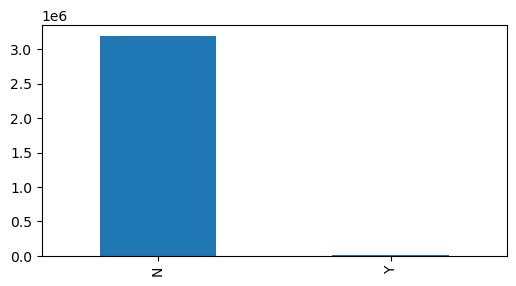

In [13]:
df1["store_and_fwd_flag"].value_counts().plot(kind="bar",figsize=(6,3))

In [14]:
df1["VendorID"].unique()

array([1, 2])

In [15]:
df1["VendorID"].value_counts()

2    2437585
1     769455
Name: VendorID, dtype: int64

In [16]:
df1["passenger_count"].nunique()

10

In [17]:
df1["passenger_count"].unique()

array([2., 0., 4., 1., 3., 5., 6., 8., 7., 9.])

In [18]:
df1["passenger_count"].value_counts(dropna=False)   # Dropna=False will show the null values too

1.0    2438039
2.0     484579
3.0     113651
4.0      64725
0.0      41443
5.0      39579
6.0      24969
8.0         42
7.0          9
9.0          4
Name: passenger_count, dtype: int64

In [19]:
(132675/3339715)*100   # 3% of the data in the passenger count is null

3.972644372349138

In [20]:
df1["RatecodeID"].nunique()

7

In [21]:
df1["RatecodeID"].unique()

array([ 1.,  2., 99.,  5.,  4.,  3.,  6.])

In [22]:
df1["RatecodeID"].value_counts(dropna=False)

1.0     3025815
2.0      121449
99.0      21342
5.0       20966
3.0       10695
4.0        6767
6.0           6
Name: RatecodeID, dtype: int64

In [23]:
(21342/3207040)*100
# We can see that there is a term with 99 value is present in the data but it can not be confirmed from the data 
# dictionary that it is present in the value. and we have computed that the percentage is only 0.666% so
# we will delete this ratecode id

0.6654734583915386

In [24]:
df1=df1.drop(df1[df1["RatecodeID"]==99].index)

In [25]:
df1.shape

(3185698, 19)

In [26]:
df1["store_and_fwd_flag"].nunique()

2

In [27]:
df1["store_and_fwd_flag"].unique()

array(['N', 'Y'], dtype=object)

In [28]:
df1["store_and_fwd_flag"].value_counts(dropna=False)

N    3171683
Y      14015
Name: store_and_fwd_flag, dtype: int64

In [29]:
df1["PULocationID"].nunique()

256

In [30]:
df1["PULocationID"].unique()

array([132, 140, 236, 141, 114,  48, 170, 144,  90, 249, 230,  79, 234,
       107, 142,  68, 137, 158, 237,  50,  43, 148, 239, 238, 231, 162,
       229, 211, 246, 261, 163, 100, 161, 164, 224, 186,   6, 233,  66,
        87, 263,  80, 113, 262,   4,  75,  88, 125, 265, 143, 152,  83,
       232, 264, 179, 226,  24, 168,  45, 151, 209, 255,  37,  63, 138,
       146, 129,   7, 157,  17, 215,  74,  12,  28,  97, 173,  41, 256,
       166,  69, 145, 116,  56,  42,  25, 130,  91, 244, 198, 243, 165,
       188, 136, 223, 235,  20,  13,  82, 248, 193, 216,  65, 181, 217,
        49,  70,  89, 131, 189,  26, 258,  61,  14, 112, 174,  93,   1,
       203,  35, 139,  51,  40, 191,  62,  33,  95,  78, 121, 202,  52,
       134,  18, 178, 196, 247, 197, 207, 218, 205, 242,   3, 260, 159,
        10, 212, 102,  32, 126,  76,  92, 119,  81, 220, 185,  72, 222,
        39, 149,  22,  71, 213, 135,   9, 160,  47, 177, 241,  23, 219,
       194, 127, 195, 133,  64, 225, 253,   8, 106,  36,  98, 20

In [31]:
df1["PULocationID"].value_counts(dropna=False)

237    164310
161    160799
132    157985
236    143964
162    119132
        ...  
201         1
204         1
245         1
109         1
172         1
Name: PULocationID, Length: 256, dtype: int64

In [32]:
df1.drop(columns="PULocationID",inplace=True)   # because it is a spars variable

In [33]:
# df1["PULocationID"].isnull().sum()  # there are no null values

In [34]:
df1["DOLocationID"].nunique()

261

In [35]:
df1["DOLocationID"].unique()

array([ 26,   7, 230, 236, 141, 263,  62, 246,  42, 148, 164, 231,  25,
       224, 255,  48, 143, 229, 163,  75, 140,  76,  13, 186,  79, 100,
       234, 244, 137, 174, 162, 177, 257, 142, 205, 113, 237, 116, 158,
       238, 165, 216, 239,  90,  74, 155,  41, 114,  49, 181, 136, 261,
       112,  80,  87, 166, 107, 146, 180, 249, 169,  68,  50, 190, 161,
        93,  97, 188,   4, 258, 262,   6, 170, 241,  33, 243,  65, 233,
       125, 144, 202, 151,  34, 219,  18, 218,  40, 223,  14, 226, 130,
        36, 256, 211, 178,  43,  69, 232, 265,  95,  39, 264, 196,  45,
        91, 168, 129,  92,  37, 242,  17, 179, 209, 145, 189, 157,  67,
       220,  71, 152,  88,  83, 203, 260,  10, 192,  52, 132,  11, 208,
        24, 225,  54, 221, 195, 119, 198, 182, 123,  98,  35,  72, 217,
        63,  89,  61, 171, 210, 228, 248,  64, 106,  22,  66, 215, 213,
       138,  82, 135, 235, 127,  28, 247, 134, 147, 131, 197, 133, 121,
       101,  85, 159, 102,  56, 149, 173,   1,  73, 167, 212, 12

In [36]:
df1["DOLocationID"].value_counts(dropna=False)

236    151731
237    147745
161    131035
230     97844
162     94333
        ...  
59         11
44          6
2           4
99          1
105         1
Name: DOLocationID, Length: 261, dtype: int64

In [37]:
df1["DOLocationID"].isnull().sum() # there are no null values in the DO location attribute

0

In [38]:
df1.drop(columns="DOLocationID",inplace=True)

#### Payment type

In [39]:
df1["payment_type"].nunique()

4

In [40]:
df1["payment_type"].unique()

array([2, 1, 3, 4], dtype=int64)

In [41]:
df1["payment_type"].value_counts(dropna=False)

1    2608850
2     507414
4      48425
3      21009
Name: payment_type, dtype: int64

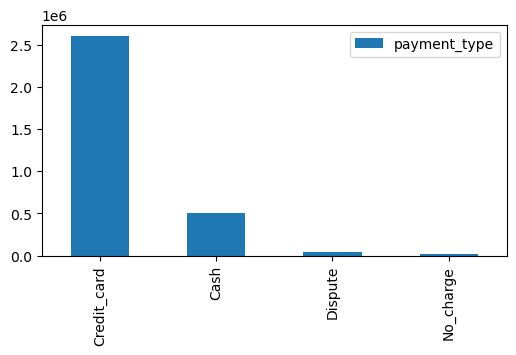

In [42]:
df1["payment_type"].value_counts().plot(kind="bar", figsize=(6,3), legend=True)
plt.xticks([0,1,3,2],["Credit_card","Cash","No_charge","Dispute"])
plt.show()

We can understand from the obove graph that most of the American people are Paying their taxi expenses using credit card.
As Over 81.9% people are paying using Credit card.
And only 15.92% people are paying using Cash.

#### MTA TAx

In [43]:
df1["mta_tax"].nunique()

6

In [44]:
df1["mta_tax"].value_counts()

 0.50    3117571
-0.50      35600
 0.00      32523
 3.50          2
 4.00          1
 0.05          1
Name: mta_tax, dtype: int64

#### Improvement surcharge

In [45]:
df1["improvement_surcharge"].nunique()

4

In [46]:
df["improvement_surcharge"].unique()

array([ 1. , -1. ,  0. ,  0.3])

In [47]:
df["improvement_surcharge"].value_counts()

 1.0    3300737
-1.0      36725
 0.0       1501
 0.3        752
Name: improvement_surcharge, dtype: int64

### Numerical Variable

In [48]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
VendorID,3185698.0,1.765164,0.423896,1.00,1.0,1.0,1.00,1.0,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
passenger_count,3185698.0,1.360424,0.869648,0.00,0.0,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,2.00,3.00,4.00,4.00,5.00,5.00,9.00
trip_distance,3185698.0,3.336554,4.823657,0.00,0.0,0.2,0.35,0.4,0.47,0.64,1.01,1.70,3.21,8.90,14.70,16.82,17.66,18.48,20.06,2008.26
RatecodeID,3185698.0,1.077545,0.412316,1.00,1.0,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,3.00,6.00
payment_type,3185698.0,1.218071,0.524319,1.00,1.0,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,3.00,4.00,4.00
fare_amount,3185698.0,19.475394,18.891461,-872.99,-3.7,4.4,5.10,5.1,5.80,6.50,9.30,13.50,21.90,41.50,70.00,70.00,70.00,70.00,79.00,1726.60
extra,3185698.0,1.558659,1.855843,-7.50,0.0,0.0,0.00,0.0,0.00,0.00,0.00,1.00,2.50,4.25,5.00,5.00,5.00,6.00,7.50,65.00
mta_tax,3185698.0,0.483723,0.116068,-0.50,-0.5,0.0,0.50,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,4.00
tip_amount,3185698.0,3.701480,4.123650,-100.00,0.0,0.0,0.00,0.0,0.00,0.00,1.00,2.94,4.62,7.95,12.38,13.87,15.40,16.19,18.28,350.00
tolls_amount,3185698.0,0.602621,2.221272,-77.75,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.94,6.94,6.94,6.94,6.94,104.75


In [49]:
# We have seen from the above numerical univariate analysis that we have outliers in trip disctance
df1[df1["trip_distance"]>20.06]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
36,2,2023-11-01 00:21:03,2023-11-01 01:00:35,1.0,22.01,2.0,N,1,70.0,0.00,0.5,16.19,6.94,1.0,98.88,2.5,1.75
79,1,2023-11-01 00:34:02,2023-11-01 01:16:06,2.0,22.20,2.0,N,1,70.0,4.25,0.5,16.54,6.94,1.0,99.23,2.5,1.75
113,1,2023-11-01 00:33:38,2023-11-01 01:10:01,1.0,20.10,2.0,N,1,70.0,4.25,0.5,3.00,6.94,1.0,85.69,2.5,1.75
180,2,2023-11-01 00:14:23,2023-11-01 01:15:09,2.0,22.01,2.0,N,2,70.0,0.00,0.5,0.00,6.94,1.0,82.69,2.5,1.75
409,2,2023-11-01 00:48:06,2023-11-01 01:48:18,1.0,25.46,1.0,N,1,103.8,1.00,0.5,31.89,0.00,1.0,139.94,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206671,2,2023-11-30 23:56:37,2023-12-01 00:24:07,2.0,25.76,4.0,N,1,157.7,1.00,0.5,40.05,0.00,1.0,202.00,0.0,1.75
3206841,2,2023-11-30 22:58:52,2023-11-30 23:34:35,1.0,20.41,2.0,N,1,70.0,0.00,0.5,15.15,0.00,1.0,90.90,2.5,1.75
3206859,2,2023-11-30 23:55:33,2023-12-01 00:35:34,2.0,32.81,4.0,N,1,191.3,1.00,0.5,38.76,0.00,1.0,232.56,0.0,0.00
3206890,2,2023-11-30 23:53:29,2023-12-01 00:29:44,4.0,20.92,2.0,N,2,70.0,0.00,0.5,0.00,6.94,1.0,82.69,2.5,1.75


We can clearly see that there are only 31759 who have had a trip distance of more than 20.6
which is less than 1% so we will drop those rows for higher accuracy.

In [50]:
df1=df1.drop(df1[df1["trip_distance"]>20.06].index)

In [51]:
df1.shape

(3153939, 17)

#### Fare amount

In [52]:
df1[df1["fare_amount"]<-3.7]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
51,2,2023-11-01 00:23:27,2023-11-01 00:27:43,1.0,1.45,1.0,N,4,-7.9,-1.0,-0.5,0.0,0.00,-1.0,-12.90,-2.5,0.0
54,2,2023-11-01 00:23:03,2023-11-01 00:56:14,2.0,9.95,1.0,N,4,-44.3,-1.0,-0.5,0.0,0.00,-1.0,-49.30,-2.5,0.0
107,2,2023-11-01 00:13:19,2023-11-01 01:03:26,1.0,14.10,1.0,N,4,-64.6,-1.0,-0.5,0.0,0.00,-1.0,-69.60,-2.5,0.0
205,2,2023-11-01 00:53:33,2023-11-01 00:56:27,2.0,0.67,1.0,N,4,-5.1,-1.0,-0.5,0.0,0.00,-1.0,-10.10,-2.5,0.0
275,2,2023-11-01 00:27:57,2023-11-01 00:47:39,1.0,3.94,1.0,N,4,-21.9,-1.0,-0.5,0.0,0.00,-1.0,-26.90,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206749,2,2023-11-30 23:44:38,2023-12-01 00:13:54,1.0,8.50,1.0,N,3,-40.1,-1.0,-0.5,0.0,-6.94,-1.0,-52.04,-2.5,0.0
3206857,2,2023-11-30 23:40:48,2023-11-30 23:50:00,2.0,0.68,5.0,N,4,-180.0,0.0,0.0,0.0,0.00,-1.0,-183.50,-2.5,0.0
3206908,2,2023-11-30 23:28:32,2023-11-30 23:40:13,1.0,1.01,1.0,N,4,-11.4,-1.0,-0.5,0.0,0.00,-1.0,-16.40,-2.5,0.0
3206910,2,2023-11-30 23:42:31,2023-12-01 00:03:06,1.0,4.07,1.0,N,4,-22.6,-1.0,-0.5,0.0,0.00,-1.0,-27.60,-2.5,0.0


In [53]:
(31007/3153939)*100
# Only 31007 has the fare less than -3.7, which is even less than 1% so we will remove these rows

0.9831198383989038

In [54]:
df1=df1.drop(df1[df1["fare_amount"]<-3.7].index)

In [55]:
df1.shape

(3122932, 17)

In [56]:
df1[df1["fare_amount"]>79]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
1229,2,2023-11-01 00:08:05,2023-11-01 00:08:16,1.0,0.00,5.0,N,1,85.00,0.00,0.0,22.12,0.00,1.0,110.62,2.5,0.00
1627,1,2023-11-01 00:03:14,2023-11-01 01:52:55,1.0,18.90,5.0,N,2,85.00,0.00,0.0,0.00,12.75,1.0,98.75,0.0,0.00
1677,2,2023-11-01 00:33:38,2023-11-01 00:33:43,1.0,0.00,5.0,N,1,82.00,0.00,0.0,17.10,0.00,1.0,102.60,2.5,0.00
1691,2,2023-11-01 00:18:57,2023-11-01 00:58:01,1.0,5.84,4.0,N,1,126.90,1.00,0.0,5.00,44.65,1.0,180.30,0.0,1.75
2014,2,2023-11-01 00:16:27,2023-11-01 00:16:31,1.0,0.02,5.0,N,1,84.69,0.00,0.0,10.00,0.00,1.0,98.19,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206816,2,2023-11-30 22:44:42,2023-11-30 22:45:07,1.0,0.00,5.0,N,1,86.89,0.00,0.0,7.00,0.00,1.0,94.89,0.0,0.00
3206817,1,2023-11-30 23:05:43,2023-11-30 23:35:50,1.0,13.80,5.0,N,1,82.00,0.00,0.0,20.75,0.00,1.0,103.75,0.0,0.00
3206837,2,2023-11-30 23:35:11,2023-11-30 23:35:18,2.0,0.02,5.0,N,1,108.00,0.00,0.0,22.30,0.00,1.0,133.80,2.5,0.00
3206858,2,2023-11-30 23:40:48,2023-11-30 23:50:00,2.0,0.68,5.0,N,4,180.00,0.00,0.0,0.00,0.00,1.0,183.50,2.5,0.00


In [57]:
(19024/3122932)*100
# Only 19024 has the fare greater than 79, which is even less than 1% so we will remove these rows

0.6091711250837354

In [58]:
df1=df1.drop(df1[df1["fare_amount"]>79].index)

In [59]:
df1.shape

(3103908, 17)

#### Extra

In [60]:
df1[df1["extra"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
461,2,2023-11-01 00:03:17,2023-11-01 00:04:02,2.0,0.25,1.0,N,4,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-8.70,-2.5,0.00
757,2,2023-11-01 00:27:41,2023-11-01 00:28:55,1.0,0.17,1.0,N,4,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-8.70,-2.5,0.00
1227,2,2023-11-01 00:04:46,2023-11-01 00:04:52,1.0,0.01,1.0,N,4,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-8.00,-2.5,0.00
1831,2,2023-11-01 00:07:05,2023-11-01 00:07:11,1.0,0.06,1.0,N,3,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2184,2,2023-11-01 00:36:38,2023-11-01 00:38:06,1.0,0.07,1.0,N,4,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203017,2,2023-11-30 23:31:03,2023-11-30 23:32:38,1.0,0.27,1.0,N,2,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-8.70,-2.5,0.00
3204698,2,2023-11-30 23:22:05,2023-11-30 23:23:02,1.0,0.00,1.0,N,3,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
3204974,2,2023-11-30 23:39:37,2023-11-30 23:39:44,1.0,0.00,1.0,N,4,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-8.00,-2.5,0.00
3206029,2,2023-11-30 23:23:41,2023-11-30 23:25:14,2.0,0.12,1.0,N,4,-3.7,-6.0,-0.5,0.0,0.0,-1.0,-12.95,0.0,-1.75


In [61]:
(2471/3103908)*100
# We can see that the extra amount paid to driver with less than 0 is even less than 1% so we will delete those rows.

0.07960931831742436

In [62]:
df1=df1.drop(df1[df1["extra"]<0].index)

In [63]:
df1.shape

(3101437, 17)

In [64]:
df1[df1["extra"]>7.5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3819,1,2023-11-01 02:52:36,2023-11-01 03:20:21,1.0,11.5,1.0,N,1,47.1,8.50,0.5,12.80,6.94,1.0,76.84,2.5,0.00
4738,1,2023-11-01 02:45:18,2023-11-01 03:05:30,1.0,9.6,1.0,N,1,38.0,8.50,0.5,5.00,12.75,1.0,65.75,2.5,0.00
4919,1,2023-11-01 03:46:47,2023-11-01 04:07:01,1.0,9.1,1.0,N,3,37.3,8.50,0.5,0.00,0.00,1.0,47.30,2.5,0.00
4979,1,2023-11-01 03:54:33,2023-11-01 04:16:21,1.0,10.6,1.0,N,1,42.2,8.50,0.5,11.80,6.94,1.0,70.94,2.5,0.00
5315,1,2023-11-01 03:42:33,2023-11-01 04:00:40,1.0,5.1,1.0,N,1,24.7,8.50,0.5,8.65,0.00,1.0,43.35,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206883,1,2023-11-30 23:13:27,2023-11-30 23:28:31,1.0,7.7,1.0,N,1,31.0,10.25,0.5,8.55,0.00,1.0,51.30,2.5,1.75
3206992,1,2023-11-30 23:16:56,2023-11-30 23:37:03,1.0,9.0,1.0,N,1,35.9,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75
3206994,1,2023-11-30 23:42:51,2023-12-01 00:07:22,1.0,10.7,1.0,N,2,42.2,10.25,0.5,0.00,0.00,1.0,53.95,2.5,1.75
3207017,1,2023-11-30 23:36:34,2023-12-01 00:09:18,4.0,12.7,1.0,N,1,50.6,10.25,0.5,12.45,0.00,1.0,74.80,2.5,1.75


In [65]:
(24350/3101437)*100
# we will delete these rows as they are outliers also the extras are less than 1%

0.7851199298905636

In [66]:
df1=df1.drop(df1[df1["extra"]>7.5].index)

In [67]:
df1.shape

(3077087, 17)

#### MTA tax

In [68]:
df1[df1["mta_tax"]>.5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
24099,1,2023-11-01 10:08:53,2023-11-01 10:26:44,1.0,6.5,1.0,N,1,28.9,0.0,4.0,9.35,6.94,0.0,49.19,0.0,0.0
1542180,1,2023-11-14 17:47:19,2023-11-14 18:04:03,1.0,3.0,1.0,N,1,26.2,0.5,3.5,0.00,0.00,0.0,30.20,0.5,0.0
2483903,1,2023-11-23 12:28:51,2023-11-23 12:49:41,3.0,1.1,1.0,N,1,14.9,0.0,3.5,0.00,0.00,0.0,18.40,0.0,0.0


In [69]:
# Removing these rows
df1=df1.drop(df1[df1["mta_tax"]>.5].index)

In [70]:
df1.shape

(3077084, 17)

#### Tip amount

In [71]:
df1[df1["tip_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
54795,2,2023-11-01 15:11:32,2023-11-01 15:11:39,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.01,0.0,-1.0,-4.51,0.0,0.0
137971,2,2023-11-02 09:17:11,2023-11-02 09:17:29,1.0,0.0,1.0,N,4,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,0.0,0.0
138690,2,2023-11-02 09:27:41,2023-11-02 09:27:57,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,0.0,0.0
165831,2,2023-11-02 13:19:53,2023-11-02 13:20:04,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,0.0,0.0
165833,2,2023-11-02 13:32:33,2023-11-02 13:32:44,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,0.0,0.0
173303,2,2023-11-02 15:20:37,2023-11-02 15:20:47,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.01,0.0,-1.0,-4.51,0.0,0.0
179307,2,2023-11-02 15:25:48,2023-11-02 15:26:09,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,0.0,0.0
295388,2,2023-11-03 15:58:30,2023-11-03 15:58:42,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.01,0.0,-1.0,-4.51,0.0,0.0
296812,2,2023-11-03 15:25:43,2023-11-03 15:25:50,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.01,0.0,-1.0,-4.51,0.0,0.0
408677,2,2023-11-04 13:05:08,2023-11-04 13:05:22,1.0,0.0,1.0,N,3,-3.0,0.0,-0.5,-0.90,0.0,-1.0,-5.40,0.0,0.0


In [72]:
# There are very less low with less than 0 tip so we will delete it.
df1=df1.drop(df1[df1["tip_amount"]<0].index)

In [73]:
df1[df1["tip_amount"]>18.28]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
85,2,2023-11-01 00:58:18,2023-11-01 01:22:26,1.0,4.92,1.0,N,1,26.1,1.00,0.5,20.05,0.00,1.0,51.15,2.5,0.00
144,2,2023-11-01 01:03:35,2023-11-01 01:14:51,1.0,1.54,1.0,N,1,12.1,1.00,0.5,19.82,0.00,1.0,36.92,2.5,0.00
200,2,2023-11-01 00:19:37,2023-11-01 01:00:27,1.0,17.93,2.0,N,1,70.0,0.00,0.5,18.94,0.00,1.0,94.69,2.5,1.75
613,1,2023-11-01 00:14:34,2023-11-01 01:05:24,2.0,17.70,2.0,N,1,70.0,4.25,0.5,20.65,6.94,1.0,103.34,2.5,1.75
621,2,2023-11-01 00:43:15,2023-11-01 01:24:01,2.0,18.31,1.0,N,1,73.7,1.00,0.5,19.05,0.00,1.0,97.00,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206231,2,2023-11-30 23:44:22,2023-12-01 00:15:21,1.0,19.72,2.0,N,1,70.0,0.00,0.5,23.53,6.94,1.0,103.72,0.0,1.75
3206639,2,2023-11-30 23:14:47,2023-11-30 23:45:59,1.0,18.78,2.0,N,1,70.0,0.00,0.5,20.67,6.94,1.0,103.36,2.5,1.75
3206711,2,2023-11-30 23:56:14,2023-12-01 00:08:25,1.0,2.99,1.0,N,1,16.3,1.00,0.5,20.00,0.00,1.0,41.30,2.5,0.00
3206771,2,2023-11-30 23:51:53,2023-12-01 00:17:07,1.0,9.45,1.0,N,1,40.8,1.00,0.5,46.00,0.00,1.0,91.05,0.0,1.75


In [74]:
(16560/3077084)*100
#since it is less than 1% we will delete it.

0.5381718536120561

In [75]:
df1=df1.drop(df1[df1["tip_amount"]>18.28].index)

In [76]:
df1.shape

(3060488, 17)

#### Tolls Amount

In [77]:
df1[df1["tolls_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
546366,2,2023-11-05 16:28:52,2023-11-05 16:29:04,1.0,0.00,1.0,N,3,-3.00,0.0,-0.5,0.00,-6.94,-1.0,-11.44,0.0,0.00
552281,2,2023-11-05 17:46:27,2023-11-05 17:47:28,1.0,0.00,5.0,N,3,-0.91,0.0,0.0,0.00,-14.00,-1.0,-15.91,0.0,0.00
1296010,2,2023-11-12 07:57:03,2023-11-12 07:58:54,1.0,0.00,1.0,N,3,-3.70,0.0,-0.5,0.00,-22.00,-1.0,-29.70,-2.5,0.00
1417866,2,2023-11-13 13:59:14,2023-11-13 14:00:17,1.0,0.00,1.0,N,4,-3.70,0.0,-0.5,0.00,-7.50,-1.0,-15.20,-2.5,0.00
1534455,2,2023-11-14 15:19:54,2023-11-14 16:07:03,1.0,17.46,2.0,N,4,0.00,0.0,-0.5,0.00,-6.94,-1.0,-10.19,0.0,-1.75
1814813,2,2023-11-16 20:00:49,2023-11-16 20:01:10,2.0,0.00,5.0,N,3,-1.43,0.0,0.0,0.00,-14.00,-1.0,-16.43,0.0,0.00
1982160,2,2023-11-18 10:26:51,2023-11-18 10:27:43,2.0,0.07,1.0,N,2,-3.00,0.0,-0.5,0.00,-67.00,-1.0,-74.00,-2.5,0.00
2181498,2,2023-11-20 07:52:00,2023-11-20 07:52:42,1.0,0.00,1.0,N,3,-3.00,0.0,-0.5,0.01,-6.94,-1.0,-11.43,0.0,0.00
2793664,2,2023-11-27 11:32:32,2023-11-27 11:32:56,1.0,0.00,1.0,N,4,-3.00,0.0,-0.5,0.00,-6.94,-1.0,-13.19,0.0,-1.75


In [78]:
df1=df1.drop(df1[df1["tolls_amount"]<0].index)

In [79]:
df1[df1["tolls_amount"]>6.94]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
151,2,2023-11-01 00:06:17,2023-11-01 00:06:41,2.0,0.28,1.0,N,2,3.7,1.0,0.5,0.00,13.10,1.0,19.30,0.0,0.00
480,2,2023-11-01 00:26:59,2023-11-01 00:45:35,1.0,9.47,1.0,N,2,37.3,1.0,0.0,0.00,12.75,1.0,52.05,0.0,0.00
819,1,2023-11-01 00:47:04,2023-11-01 01:33:10,2.0,3.00,5.0,N,1,45.0,0.0,0.0,11.75,12.75,1.0,70.50,0.0,0.00
2161,2,2023-11-01 00:29:57,2023-11-01 00:59:52,5.0,16.90,2.0,N,1,70.0,0.0,0.5,17.14,9.94,1.0,102.83,2.5,1.75
2472,2,2023-11-01 01:48:04,2023-11-01 02:16:55,1.0,15.36,4.0,N,1,46.4,1.0,0.0,15.29,12.75,1.0,76.44,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203080,2,2023-11-30 23:06:41,2023-11-30 23:25:40,1.0,8.82,1.0,N,1,36.6,1.0,0.5,7.66,11.94,1.0,58.70,0.0,0.00
3204166,2,2023-11-30 23:04:46,2023-11-30 23:42:25,1.0,18.63,5.0,N,1,75.0,0.0,0.0,4.00,20.82,1.0,103.32,2.5,0.00
3206229,2,2023-11-30 23:28:55,2023-12-01 00:06:24,1.0,14.59,1.0,N,1,59.7,1.0,0.5,15.72,13.88,1.0,94.30,2.5,0.00
3206825,1,2023-11-30 23:45:01,2023-12-01 00:14:56,1.0,5.10,3.0,N,1,48.2,0.0,0.0,18.05,23.00,1.0,90.25,0.0,0.00


In [80]:
(4516/3060488)*100
# We will delete these rows

0.14755816719425136

In [81]:
df1=df1.drop(df1[df1["tolls_amount"]>6.94].index)

In [82]:
df1.shape

(3055963, 17)

In [83]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
VendorID,3055963.0,1.767355,0.422518,1.00,1.0,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.0000,2.00,2.00,2.00
passenger_count,3055963.0,1.357573,0.869769,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,4.00,4.0000,5.00,5.00,8.00
trip_distance,3055963.0,2.948851,3.634133,0.00,0.0,0.28,0.38,0.42,0.49,0.65,1.00,1.68,3.00,7.13,10.99,12.30,15.8000,17.34,18.26,20.06
RatecodeID,3055963.0,1.043770,0.288337,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.0000,2.00,2.00,6.00
payment_type,3055963.0,1.195899,0.469545,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.0000,2.00,3.00,4.00
fare_amount,3055963.0,18.240963,14.398333,-3.70,4.4,5.10,5.10,5.80,5.80,6.50,9.30,13.50,21.20,36.60,51.30,58.30,70.0000,70.00,70.00,79.00
extra,3055963.0,1.526355,1.691570,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.50,3.50,5.00,5.00,5.0000,5.00,6.75,7.50
mta_tax,3055963.0,0.497400,0.041547,-0.50,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.5000,0.50,0.50,0.50
tip_amount,3055963.0,3.429283,3.294571,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.08,2.94,4.48,7.00,10.43,11.69,12.9500,14.80,16.19,18.28
tolls_amount,3055963.0,0.431328,1.672591,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.94,6.94,6.9400,6.94,6.94,6.94


### Bivariate

In [84]:
# CAT-CAT

#### Vendor ID-PU LOcation ID

In [85]:
from scipy.stats import chi2_contingency

In [86]:
df_chi1 = pd.crosstab(df1["VendorID"],df1["RatecodeID"])
df_chi1

RatecodeID,1.0,2.0,3.0,4.0,5.0,6.0
VendorID,,,,,,
1,693652,14839,230,449,1779,4
2,2261582,73494,943,1369,7620,2


In [87]:
chi2_contingency(df_chi1)

Chi2ContingencyResult(statistic=2255.9595087734547, pvalue=0.0, dof=5, expected_freq=array([[6.87518952e+05, 2.05501871e+04, 2.72892005e+02, 4.22947710e+02,
        2.18662570e+03, 1.39586703e+00],
       [2.26771505e+06, 6.77828129e+04, 9.00107995e+02, 1.39505229e+03,
        7.21237430e+03, 4.60413297e+00]]))

### Cat Num


In [88]:
df1.groupby(["store_and_fwd_flag"]).agg({"total_amount":["min","mean","max","count"]})

total_amount                            
                            min       mean     max    count
store_and_fwd_flag                                         
N                         -10.2  27.054928  114.34  3042529
Y                          -4.5  25.098341  105.84    13434

##### Vendor ID

In [89]:
df1.groupby(["VendorID"]).agg({"passenger_count":["min","mean","max","count"]})

passenger_count                        
                     min      mean  max    count
VendorID                                        
1                    0.0  1.218245  7.0   710953
2                    0.0  1.399814  8.0  2345010

In [90]:
df1.groupby(["VendorID"]).agg({"trip_distance":["min","mean","max","count"]})

trip_distance                          
                   min      mean    max    count
VendorID                                        
1                  0.0  2.525533  20.00   710953
2                  0.0  3.077191  20.06  2345010

In [91]:
df1.groupby(["VendorID"]).agg({"fare_amount":["min","mean","max","count"]})

fare_amount                          
                 min       mean   max    count
VendorID                                      
1                0.0  16.410027  79.0   710953
2               -3.7  18.796061  79.0  2345010

In [92]:
df1.groupby(["VendorID"]).agg({"extra":["min","mean","max","count"]})

extra                        
           min      mean  max    count
VendorID                              
1          0.0  3.225501  7.5   710953
2          0.0  1.011213  7.5  2345010

In [93]:
df1.groupby(["VendorID"]).agg({"mta_tax":["min","mean","max","count"]})

mta_tax                        
             min      mean  max    count
VendorID                                
1            0.0  0.497861  0.5   710953
2           -0.5  0.497260  0.5  2345010

In [94]:
df1.groupby(["VendorID"]).agg({"tip_amount":["min","mean","max","count"]})

tip_amount                          
                min      mean    max    count
VendorID                                     
1               0.0  3.058068  18.25   710953
2               0.0  3.541827  18.28  2345010

In [95]:
df1.groupby(["VendorID"]).agg({"tolls_amount":["min","mean","max","count"]})

tolls_amount                         
                  min      mean   max    count
VendorID                                      
1                 0.0  0.230304  6.94   710953
2                 0.0  0.492273  6.94  2345010

In [96]:
df1.groupby(["VendorID"]).agg({"improvement_surcharge":["min","mean","max","count"]})

improvement_surcharge                        
                           min      mean  max    count
VendorID                                              
1                          0.0  0.999423  1.0   710953
2                         -1.0  0.997557  1.0  2345010

In [97]:
df1.groupby(["VendorID"]).agg({"total_amount":["min","mean","max","count"]})

total_amount                            
                  min       mean     max    count
VendorID                                         
1                 0.0  24.421184  109.54   710953
2               -10.2  27.842210  114.34  2345010

In [98]:
df1.groupby(["VendorID"]).agg({"congestion_surcharge":["min","mean","max","count"]})

congestion_surcharge                        
                          min      mean  max    count
VendorID                                             
1                         0.0  2.378670  2.5   710953
2                        -2.5  2.356103  2.5  2345010

In [99]:
df1.groupby(["VendorID"]).agg({"Airport_fee":["min","mean","max","count"]})

Airport_fee                         
                 min      mean   max    count
VendorID                                     
1               0.00  0.055927  1.75   710953
2              -1.75  0.144970  1.75  2345010

#### RAtecode ID


In [100]:
df1.groupby(["RatecodeID"]).agg({"passenger_count":["min","mean","max","count"]})

passenger_count                        
                       min      mean  max    count
RatecodeID                                        
1.0                    0.0  1.350790  7.0  2955234
2.0                    0.0  1.562904  6.0    88333
3.0                    0.0  1.695652  6.0     1173
4.0                    0.0  1.364136  6.0     1818
5.0                    0.0  1.517183  8.0     9399
6.0                    1.0  1.333333  3.0        6

In [101]:
df1.groupby(["RatecodeID"]).agg({"trip_distance":["min","mean","max","count"]})

trip_distance                           
                     min       mean    max    count
RatecodeID                                         
1.0                  0.0   2.541288  20.06  2955234
2.0                  0.0  16.573583  20.06    88333
3.0                  0.0   2.475584  18.10     1173
4.0                  0.0  10.163806  19.60     1818
5.0                  0.0   1.713183  20.05     9399
6.0                  0.0   0.115000   0.30        6

In [102]:
df1.groupby(["RatecodeID"]).agg({"fare_amount":["min","mean","max","count"]})

fare_amount                           
                   min       mean    max    count
RatecodeID                                       
1.0               -3.7  16.614035  78.60  2955234
2.0                0.0  69.919722  75.75    88333
3.0                0.0  32.788065  79.00     1173
4.0               -3.0  52.047690  78.60     1818
5.0               -3.5  35.750243  79.00     9399
6.0                2.5   4.745000   8.97        6

In [103]:
df1.groupby(["RatecodeID"]).agg({"extra":["min","mean","max","count"]})

extra                         
             min      mean   max    count
RatecodeID                               
1.0          0.0  1.532472  7.50  2955234
2.0          0.0  1.419503  7.50    88333
3.0          0.0  1.502344  7.50     1173
4.0          0.0  1.704070  7.50     1818
5.0          0.0  0.576870  6.75     9399
6.0          0.0  0.000000  0.00        6

In [104]:
df1.groupby(["RatecodeID"]).agg({"mta_tax":["min","mean","max","count"]})

mta_tax                        
               min      mean  max    count
RatecodeID                                
1.0           -0.5  0.498914  0.5  2955234
2.0           -0.5  0.499287  0.5    88333
3.0            0.0  0.000000  0.0     1173
4.0           -0.5  0.495875  0.5     1818
5.0           -0.5  0.066124  0.5     9399
6.0            0.5  0.500000  0.5        6

In [105]:
df1.groupby(["RatecodeID"]).agg({"tip_amount":["min","mean","max","count"]})

tip_amount                           
                  min       mean    max    count
RatecodeID                                      
1.0               0.0   3.226836  18.28  2955234
2.0               0.0  10.068666  18.19    88333
3.0               0.0   2.379318  18.26     1173
4.0               0.0   5.203245  18.20     1818
5.0               0.0   4.475128  18.20     9399
6.0               0.0   0.000000   0.00        6

In [106]:
df1.groupby(["RatecodeID"]).agg({"tolls_amount":["min","mean","max","count"]})

tolls_amount                         
                    min      mean   max    count
RatecodeID                                      
1.0                 0.0  0.278418  6.94  2955234
2.0                 0.0  5.530835  6.94    88333
3.0                 0.0  0.696488  6.94     1173
4.0                 0.0  0.490523  6.94     1818
5.0                 0.0  0.538978  6.94     9399
6.0                 0.0  0.000000  0.00        6

In [107]:
df1.groupby(["RatecodeID"]).agg({"improvement_surcharge":["min","mean","max","count"]})

improvement_surcharge                        
                             min      mean  max    count
RatecodeID                                              
1.0                         -1.0  0.998014  1.0  2955234
2.0                         -1.0  0.998917  1.0    88333
3.0                         -1.0  0.988917  1.0     1173
4.0                         -1.0  0.997800  1.0     1818
5.0                         -1.0  0.983147  1.0     9399
6.0                          1.0  1.000000  1.0        6

In [108]:
df1.groupby(["RatecodeID"]).agg({"total_amount":["min","mean","max","count"]})

total_amount                            
                    min       mean     max    count
RatecodeID                                         
1.0              -10.20  25.044966  114.34  2955234
2.0               -5.75  91.360232  108.23    88333
3.0               -1.00  38.781816  111.24     1173
4.0               -4.00  62.255484  109.68     1818
5.0               -7.00  43.622269  108.53     9399
6.0                4.00   6.370000   10.47        6

In [109]:
df1.groupby(["RatecodeID"]).agg({"congestion_surcharge":["min","mean","max","count"]})

congestion_surcharge                         
                            min      mean   max    count
RatecodeID                                              
1.0                        -2.5  2.369632  2.50  2955234
2.0                        -2.5  2.294329  2.50    88333
3.0                         0.0  0.014919  2.50     1173
4.0                         0.0  0.192519  2.50     1818
5.0                        -2.5  1.101979  2.50     9399
6.0                         0.0  0.125000  0.75        6

In [110]:
df1.groupby(["RatecodeID"]).agg({"Airport_fee":["min","mean","max","count"]})

Airport_fee                         
                   min      mean   max    count
RatecodeID                                     
1.0              -1.75  0.091770  1.75  2955234
2.0              -1.75  1.174241  1.75    88333
3.0               0.00  0.474425  1.75     1173
4.0              -1.75  1.505501  1.75     1818
5.0              -1.75  0.159565  1.75     9399
6.0               0.00  0.000000  0.00        6

#### Payment_type

In [111]:
df1.groupby(["payment_type"]).agg({"passenger_count":["min","mean","max","count"]})

passenger_count                        
                         min      mean  max    count
payment_type                                        
1                        0.0  1.346396  8.0  2526679
2                        0.0  1.423460  7.0   486716
3                        0.0  1.211435  8.0    15759
4                        0.0  1.300757  6.0    26809

In [112]:
df1.groupby(["payment_type"]).agg({"fare_amount":["min","mean","max","count"]})

fare_amount                          
                     min       mean   max    count
payment_type                                      
1                   -3.0  18.256882  79.0  2526679
2                   -3.7  18.395389  79.0   486716
3                   -3.7  13.383537  79.0    15759
4                   -3.7  16.792416  78.6    26809

In [113]:
df1.groupby(["payment_type"]).agg({"extra":["min","mean","max","count"]})

extra                        
               min      mean  max    count
payment_type                              
1              0.0  1.552957  7.5  2526679
2              0.0  1.388304  7.5   486716
3              0.0  2.004201  7.5    15759
4              0.0  1.244582  7.5    26809

In [114]:
df1.groupby(["payment_type"]).agg({"mta_tax":["min","mean","max","count"]})

mta_tax                        
                 min      mean  max    count
payment_type                                
1               -0.5  0.498457  0.5  2526679
2               -0.5  0.497164  0.5   486716
3               -0.5  0.423441  0.5    15759
4               -0.5  0.445578  0.5    26809

In [115]:
df1.groupby(["payment_type"]).agg({"fare_amount":["min","mean","max","count"]})

fare_amount                          
                     min       mean   max    count
payment_type                                      
1                   -3.0  18.256882  79.0  2526679
2                   -3.7  18.395389  79.0   486716
3                   -3.7  13.383537  79.0    15759
4                   -3.7  16.792416  78.6    26809

In [116]:
df1.groupby(["payment_type"]).agg({"tip_amount":["min","mean","max","count"]})

tip_amount                          
                    min      mean    max    count
payment_type                                     
1                   0.0  4.147532  18.28  2526679
2                   0.0  0.000288  16.19   486716
3                   0.0  0.003112  10.08    15759
4                   0.0  0.003454  12.40    26809

In [117]:
df1.groupby(["payment_type"]).agg({"tolls_amount":["min","mean","max","count"]})

tolls_amount                         
                      min      mean   max    count
payment_type                                      
1                     0.0  0.442765  6.94  2526679
2                     0.0  0.387713  6.94   486716
3                     0.0  0.177086  6.94    15759
4                     0.0  0.294666  6.94    26809

In [118]:
df1.groupby(["payment_type"]).agg({"improvement_surcharge":["min","mean","max","count"]})

improvement_surcharge                        
                               min      mean  max    count
payment_type                                              
1                             -1.0  0.999861  1.0  2526679
2                             -1.0  0.997196  1.0   486716
3                             -1.0  0.872581  1.0    15759
4                             -1.0  0.909918  1.0    26809

In [119]:
df1.groupby(["payment_type"]).agg({"total_amount":["min","mean","max","count"]})

total_amount                            
                      min       mean     max    count
payment_type                                         
1                    -7.0  27.849127  114.34  2526679
2                   -10.2  23.494842   98.79   486716
3                   -10.2  17.481652   89.44    15759
4                   -10.2  21.483882   94.09    26809

In [120]:
df1.groupby(["payment_type"]).agg({"congestion_surcharge":["min","mean","max","count"]})

congestion_surcharge                        
                              min      mean  max    count
payment_type                                             
1                            -2.5  2.395628  2.5  2526679
2                            -2.5  2.226022  2.5   486716
3                            -2.5  1.722508  2.5    15759
4                            -2.5  1.963520  2.5    26809

In [121]:
df1.groupby(["payment_type"]).agg({"Airport_fee":["min","mean","max","count"]})

Airport_fee                         
                     min      mean   max    count
payment_type                                     
1                   0.00  0.116712  1.75  2526679
2                  -1.75  0.160695  1.75   486716
3                  -1.75  0.139809  1.75    15759
4                  -1.75  0.164497  1.75    26809

## Num-Num

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3055963 entries, 0 to 3207039
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  Airport_fee            float64       
dtypes: datetime64[ns](2), float64(12), int32(1), int64(1), object(1)


<Axes: xlabel='passenger_count', ylabel='trip_distance'>

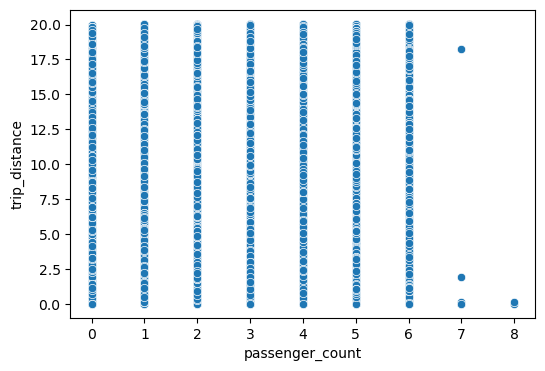

In [123]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["passenger_count"], y=df1["trip_distance"])
# There is no correlation between passenger count and trip distance which is a good thing because x variable and x variable
# should not be correlated.

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

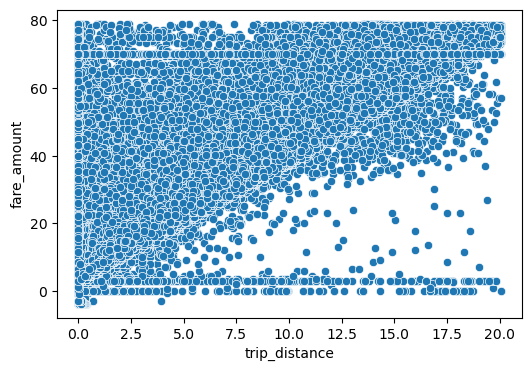

In [124]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["fare_amount"])

#### There is no correlation between trip distance and fare amount which is a good thing.

<Axes: xlabel='trip_distance', ylabel='extra'>

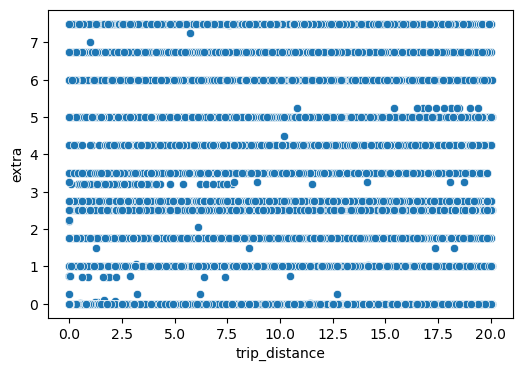

In [125]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["extra"])

<Axes: xlabel='trip_distance', ylabel='mta_tax'>

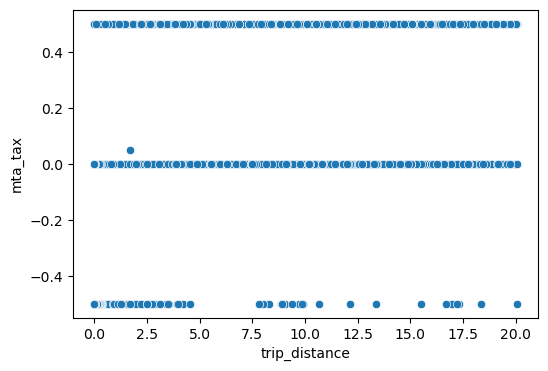

In [126]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["mta_tax"])

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

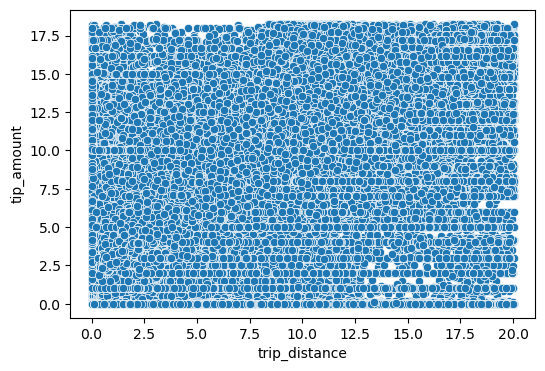

In [127]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["tip_amount"])

<Axes: xlabel='trip_distance', ylabel='tolls_amount'>

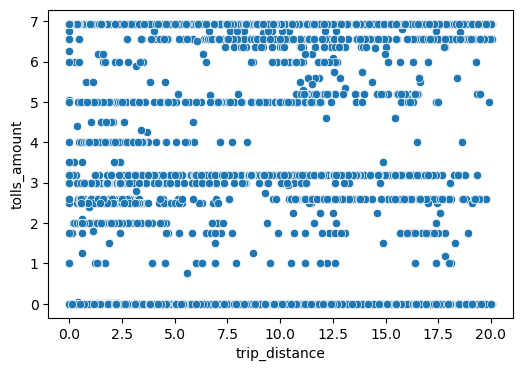

In [128]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["tolls_amount"])

<Axes: xlabel='trip_distance', ylabel='improvement_surcharge'>

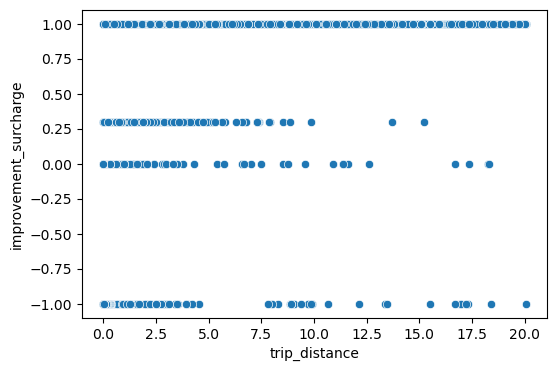

In [129]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["improvement_surcharge"])

<Axes: xlabel='trip_distance', ylabel='total_amount'>

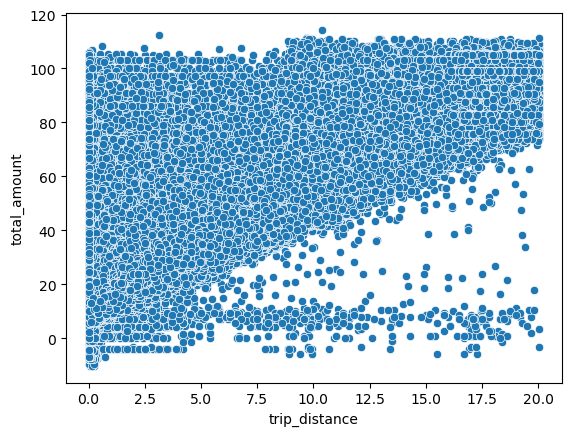

In [130]:
# plt.figure(figsize=(6,6))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["total_amount"])

<Axes: xlabel='trip_distance', ylabel='congestion_surcharge'>

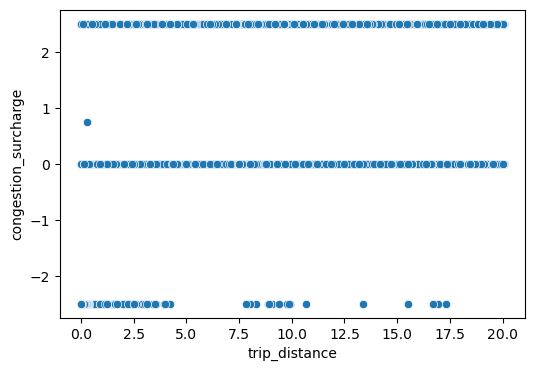

In [131]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["congestion_surcharge"])

<Axes: xlabel='trip_distance', ylabel='Airport_fee'>

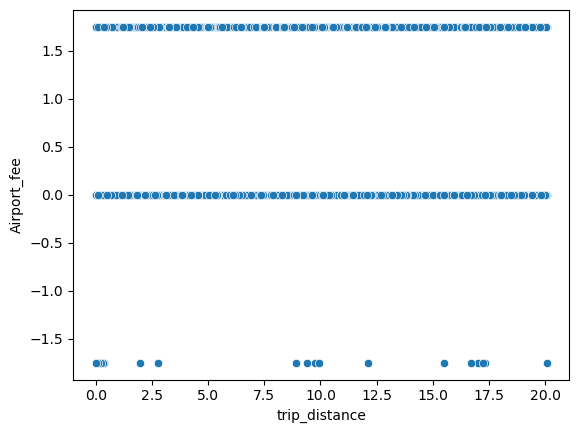

In [132]:
# plt.figure(figsize=(6,6))
sns.scatterplot(data=df1, x=df1["trip_distance"], y=df1["Airport_fee"])

#### Fare amount

<Axes: xlabel='fare_amount', ylabel='total_amount'>

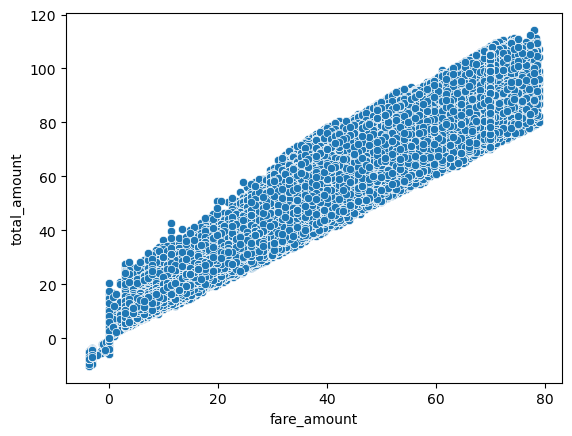

In [133]:
# plt.figure(figsize=(6,6))
sns.scatterplot(data=df1, x=df1["fare_amount"], y=df1["total_amount"])

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

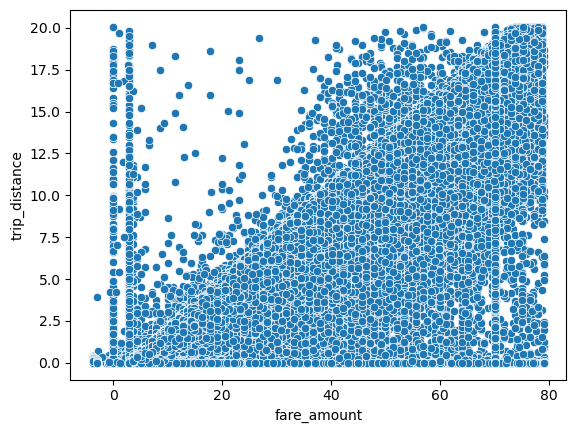

In [134]:
# plt.figure(figsize=(6,6))
sns.scatterplot(data=df1, x=df1["fare_amount"], y=df1["trip_distance"])

In [135]:
# there is no correlation between fare amount and trip distance.

<Axes: xlabel='fare_amount', ylabel='extra'>

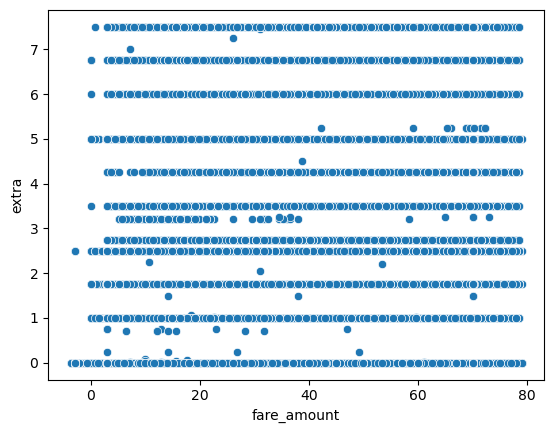

In [136]:
sns.scatterplot(data=df1, x=df1["fare_amount"], y=df1["extra"])

<Axes: xlabel='fare_amount', ylabel='mta_tax'>

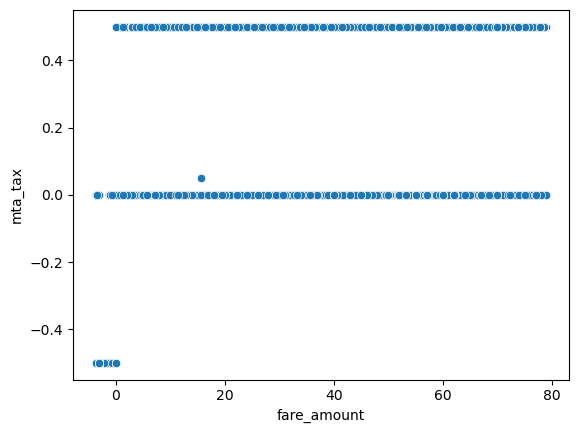

In [137]:
sns.scatterplot(data=df1, x=df1["fare_amount"], y=df1["mta_tax"])

<Axes: xlabel='fare_amount', ylabel='tip_amount'>

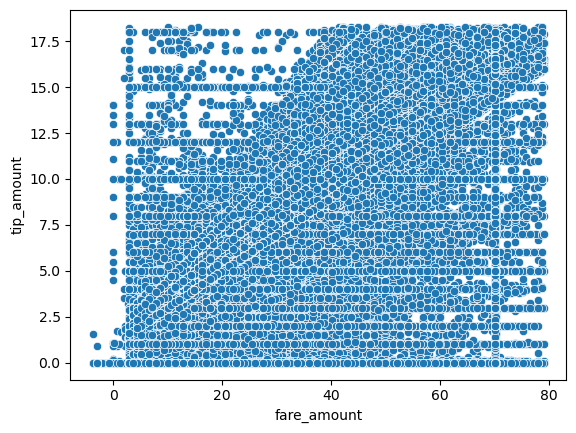

In [138]:
sns.scatterplot(data=df1, x=df1["fare_amount"], y=df1["tip_amount"])

#### Total Amount

<Axes: xlabel='total_amount', ylabel='trip_distance'>

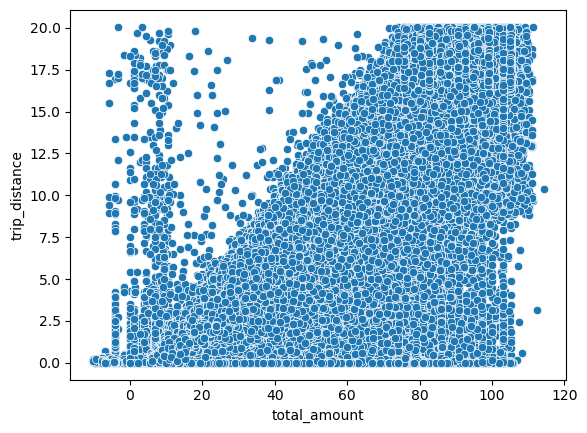

In [139]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["trip_distance"])

<Axes: xlabel='total_amount', ylabel='fare_amount'>

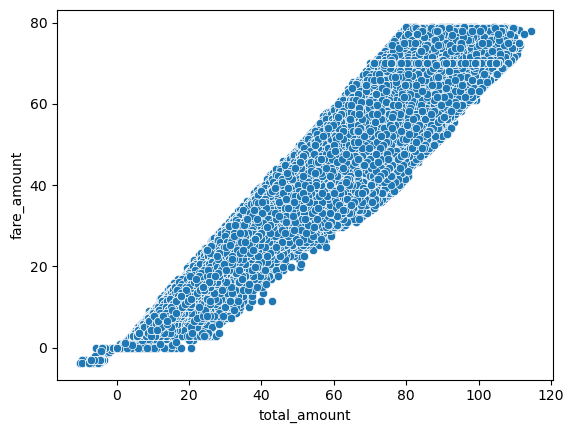

In [140]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["fare_amount"])

It can be seen that they are highly correlated.

<Axes: xlabel='total_amount', ylabel='extra'>

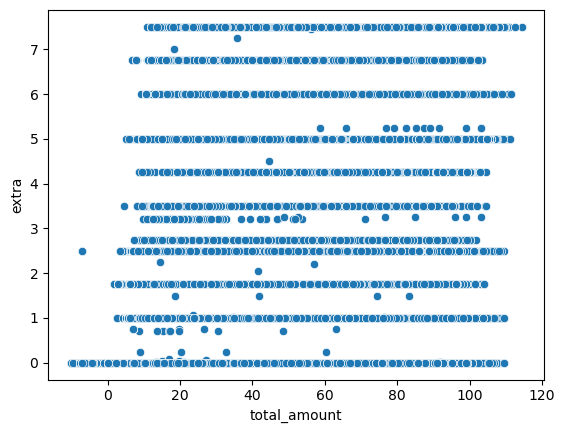

In [141]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["extra"])

<Axes: xlabel='total_amount', ylabel='mta_tax'>

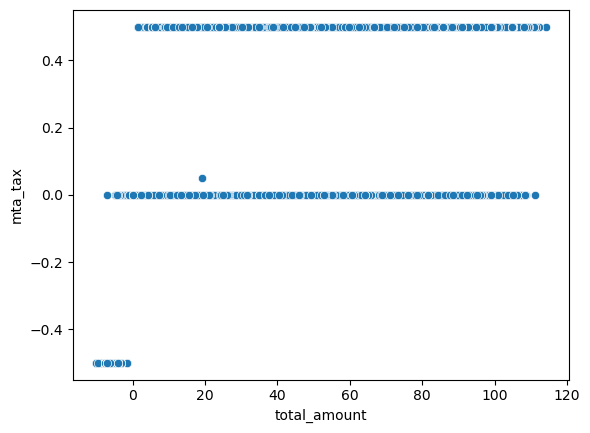

In [142]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["mta_tax"])

<Axes: xlabel='total_amount', ylabel='tip_amount'>

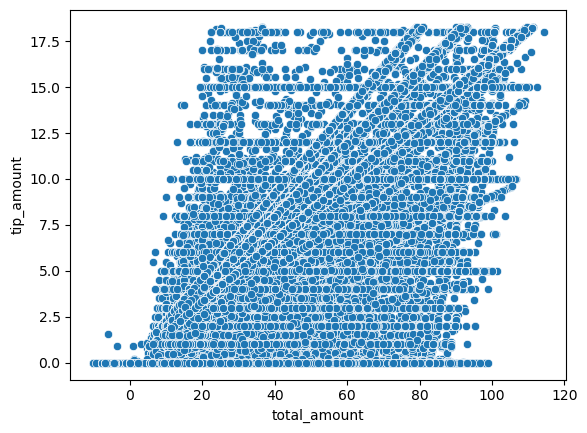

In [143]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["tip_amount"])

<Axes: xlabel='total_amount', ylabel='tolls_amount'>

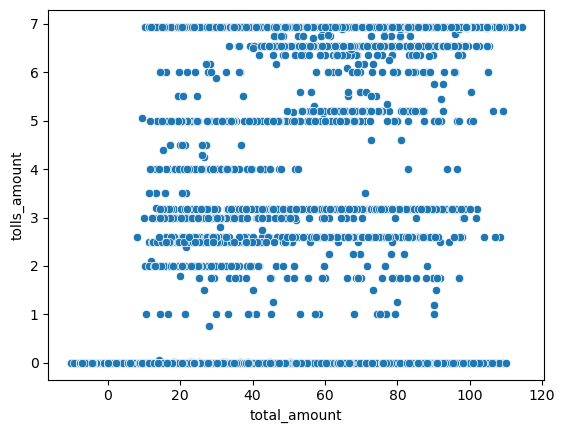

In [144]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["tolls_amount"])

<Axes: xlabel='total_amount', ylabel='improvement_surcharge'>

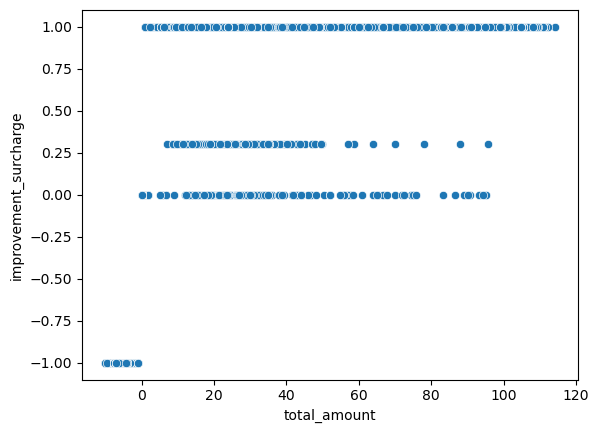

In [145]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["improvement_surcharge"])

<Axes: xlabel='total_amount', ylabel='congestion_surcharge'>

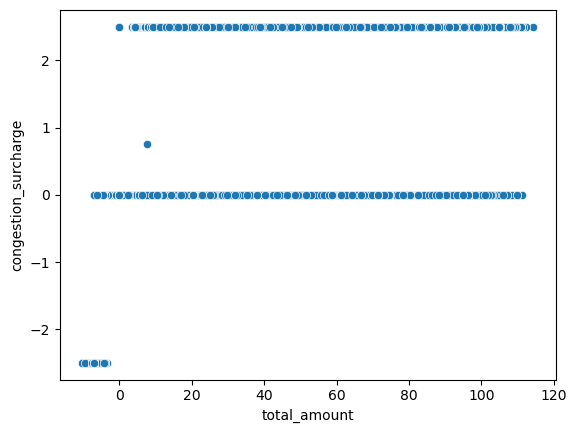

In [146]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["congestion_surcharge"])

<Axes: xlabel='total_amount', ylabel='Airport_fee'>

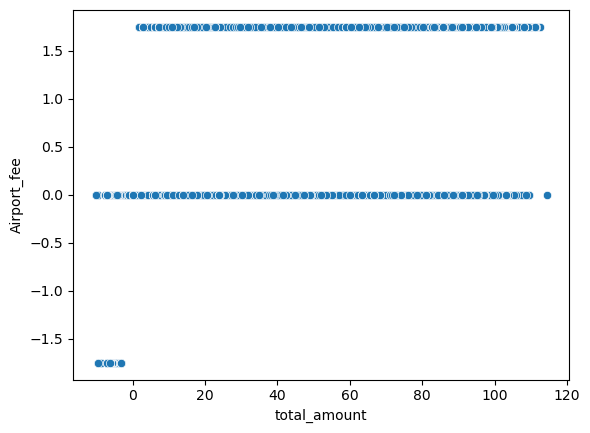

In [147]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["Airport_fee"])

<Axes: xlabel='total_amount', ylabel='store_and_fwd_flag'>

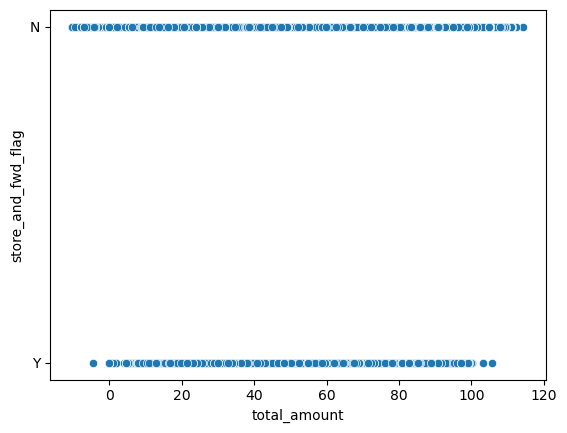

In [148]:
sns.scatterplot(data=df1, x=df1["total_amount"], y=df1["store_and_fwd_flag"])

### Feature Engineering

In [149]:
# df1.info()

In [150]:
#dropping time variables
df1.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime"], inplace= True)

In [151]:
df1.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2.0,13.60,1.0,N,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75
1,1,0.0,3.50,1.0,N,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00
2,2,4.0,18.61,2.0,N,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
3,2,1.0,0.39,1.0,N,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00
4,2,1.0,1.20,1.0,N,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00


In [152]:
df1.dtypes=="object"

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag        True
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
Airport_fee              False
dtype: bool

In [153]:
cat_data=df1[df1.dtypes[df.dtypes=="object"].index]   # seperating object variables
cat_data

,store_and_fwd_flag
0,N
1,N
2,N
3,N
4,N
...,...
3207035,N
3207036,N
3207037,N
3207038,N


In [154]:
num_data=df1[df1.dtypes[df.dtypes!="object"].index]
num_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2.0,13.60,1.0,2,61.8,2.75,0.5,0.00,0.00,1.0,66.05,0.0,1.75
1,1,0.0,3.50,1.0,1,20.5,3.50,0.5,5.10,0.00,1.0,30.60,2.5,0.00
2,2,4.0,18.61,2.0,1,70.0,0.00,0.5,16.54,6.94,1.0,99.23,2.5,1.75
3,2,1.0,0.39,1.0,1,4.4,1.00,0.5,1.88,0.00,1.0,11.28,2.5,0.00
4,2,1.0,1.20,1.0,1,10.0,1.00,0.5,3.00,0.00,1.0,18.00,2.5,0.00


In [155]:
cat_data.isnull().sum()

store_and_fwd_flag    0
dtype: int64

In [156]:
num_data.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [157]:
def outliercap(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [158]:
num_data=num_data.apply(outliercap)

In [159]:
num_data.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
VendorID,3055963.0,1.767355,0.422518,1.0,1.0,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.0000,2.00,2.00,2.00
passenger_count,3055963.0,1.349575,0.830757,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,4.00,4.0000,5.00,5.00,5.00
trip_distance,3055963.0,2.941548,3.602134,0.0,0.0,0.28,0.38,0.42,0.49,0.65,1.00,1.68,3.00,7.13,10.99,12.30,15.8000,17.34,18.26,18.26
RatecodeID,3055963.0,1.032961,0.178536,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.0000,2.00,2.00,2.00
payment_type,3055963.0,1.187127,0.424228,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.0000,2.00,3.00,3.00
fare_amount,3055963.0,18.247556,14.341248,4.4,4.4,5.10,5.10,5.80,5.80,6.50,9.30,13.50,21.20,36.60,51.30,58.30,70.0000,70.00,70.00,70.00
extra,3055963.0,1.519776,1.669640,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.50,3.50,5.00,5.00,5.0000,5.00,6.75,6.75
mta_tax,3055963.0,0.500000,0.000000,0.5,0.5,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.5000,0.50,0.50,0.50
tip_amount,3055963.0,3.424330,3.274543,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.08,2.94,4.48,7.00,10.43,11.69,12.9500,14.80,16.19,16.19
tolls_amount,3055963.0,0.431328,1.672591,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.94,6.94,6.9400,6.94,6.94,6.94


#### Dummy Creation

In [160]:
cat_data1=pd.get_dummies(cat_data,drop_first=True)
cat_data1.nunique()

store_and_fwd_flag_Y    2
dtype: int64

In [161]:
# cat_data.unique()

In [162]:
final_data0=pd.concat([num_data,cat_data1],axis=1)
final_data0.head(2)

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,store_and_fwd_flag_Y
0,1,2.0,13.6,1.0,2,61.8,2.75,0.5,0.0,0.0,1.0,66.05,0.0,1.75,0
1,1,0.0,3.5,1.0,1,20.5,3.50,0.5,5.1,0.0,1.0,30.60,2.5,0.00,0


In [163]:
# Assumptions
# 1. Y must be continuous
# 2. Y should have Relationsip with X variables
# 3. Y should be normally distributed
# 4. Multicollinearity
# 5. No autocorrelation
# 6. No Hetroscedasticity

<Axes: xlabel='total_amount', ylabel='Density'>

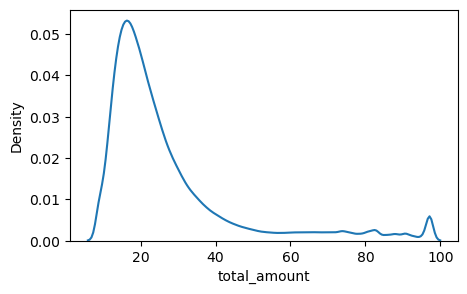

In [164]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=final_data0, x=final_data0["total_amount"])

In [165]:
# Shapiro Hypothesis testing
# null hypothesis =  Data is normal
# alternative hypothesis = data is not normal
# 95% - alpha = 0.05
from scipy import stats
stats.shapiro(final_data0["total_amount"])

D:\Anaconda\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7387919425964355, pvalue=0.0)

In [166]:
# How to make it normal
# try - square , square root, cube, cube root, etc
# try log and its varient

D:\Anaconda\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9076067805290222, pvalue=0.0)


<Axes: xlabel='Total_Amount', ylabel='Density'>

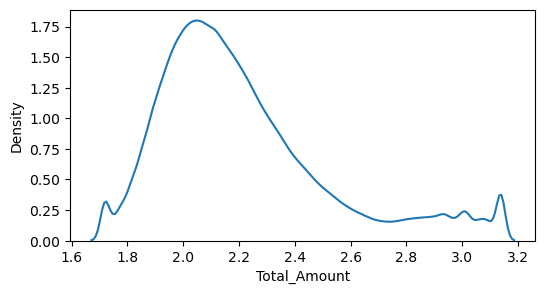

In [167]:
final_data0["Total_Amount"]=(final_data0["total_amount"])**(1/4)

print(stats.shapiro(final_data0["Total_Amount"]))

plt.figure(figsize=(6,3))
sns.kdeplot(data=final_data0, x=final_data0["Total_Amount"])

In [168]:
final_data0.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'store_and_fwd_flag_Y',
       'Total_Amount'],
      dtype='object')

In [169]:
cr=final_data0[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'store_and_fwd_flag_Y']].corr()

<Axes: >

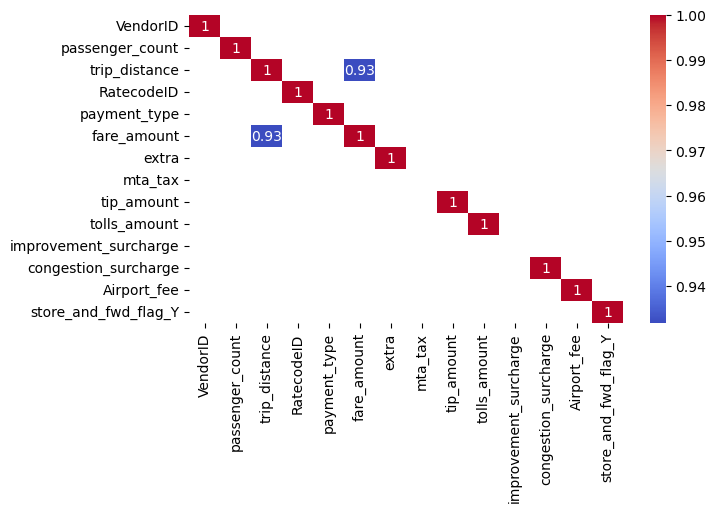

In [170]:
cr1=cr[abs(cr)>.7]
plt.figure(figsize=(7,4))
sns.heatmap(cr1, cmap = "coolwarm", annot=True)

In [171]:
y=final_data0["Total_Amount"]
x= final_data0[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'store_and_fwd_flag_Y']]

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=88)

In [173]:
x_train.head(2)

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,store_and_fwd_flag_Y
1504750,2,1.0,0.67,1.0,1,8.6,0.0,0.5,2.52,0.0,1.0,2.5,0.0,0
2898254,2,1.0,1.56,1.0,2,12.8,0.0,0.5,0.00,0.0,1.0,2.5,0.0,0


In [174]:
import statsmodels.api as sm

x_train1=x_train[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee']]
xtrain1 = sm.add_constant(x_train1)
model = sm.OLS(y_train, x_train1)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Amount   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.962e+06
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:42:19   Log-Likelihood:             3.1773e+06
No. Observations:             2139174   AIC:                        -6.355e+06
Df Residuals:                 2139162   BIC:                        -6.354e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
VendorID                  0.05

In [175]:
# Linear Regr:
# Null Hyp : all m values are zeros
# Alter Hyp: atleast one m value is not zero

# Alpha - o.o5

In [176]:
import statsmodels.api as sm
x_train1=x_train[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee']]

x_train1 = sm.add_constant(x_train1)
model = sm.OLS(y_train,x_train1)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Amount   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.962e+06
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:42:22   Log-Likelihood:             3.1773e+06
No. Observations:             2139174   AIC:                        -6.355e+06
Df Residuals:                 2139162   BIC:                        -6.354e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
VendorID                  0.05

####  With SkLearn

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
y=final_data0["Total_Amount"]
x=final_data0[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee']]

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=88)

In [180]:
lr=LinearRegression()
lr.fit(x_train, y_train) # model traiing

LinearRegression()

In [181]:
lr.coef_

array([ 5.28802778e-02,  7.65066113e-04, -1.01642074e-02, -2.22862531e-01,
       -3.77377506e-02,  2.25922678e-02,  2.15656334e-02,  1.30729698e-02,
        7.94163541e-04,  1.66533454e-16,  2.12276052e-02, -1.50865359e-02])

In [182]:
lr.intercept_   # constant

1.8833508536858237

In [183]:
#Model evalution
# MSE, RMSE, MAE, MAPE
# MSE=(Pred-Act)^2/ N
# RMSE= (MSE)**(1/2) or RMSE= ((( Pred-Act)^(2))/N)^(1/2)
# MAE - Mean absolute Error - = mean(abs(Pred-Act))
# MAPE - Mean Absolute percentage Error - = mean(abs((Pred-Act)/Act))

In [184]:
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [185]:
pred_train

array([2.00277257, 2.01793232, 2.04340829, ..., 1.90322349, 2.95554503,
       2.2616247 ])

<Axes: >

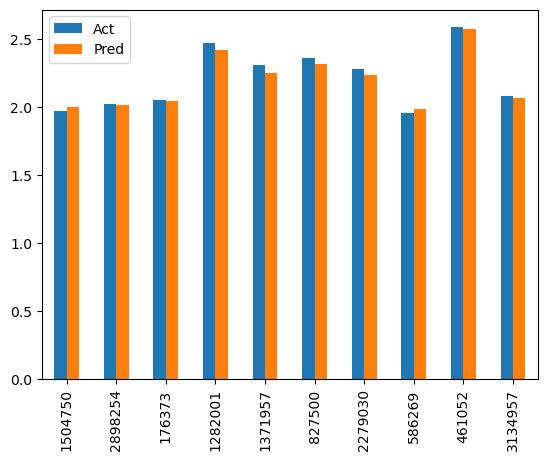

In [186]:
pd.DataFrame({"Act":y_train, "Pred":pred_train}).head(10).plot(kind="bar")

In [187]:
pd.DataFrame({"Act":y_train,"Pred":pred_train}).head()

,Act,Pred
1504750,1.971914,2.002773
2898254,2.024544,2.017932
176373,2.049390,2.043408
1282001,2.472965,2.423467
1371957,2.307889,2.251287


In [188]:
print("Train MSE:", np.mean(pred_train-y_train)**2)
print("Test MSE:", np.mean(pred_test-y_test)**2)

Train MSE: 8.517346153726308e-31
Test MSE: 3.1564714348892645e-10


The MSE of the Train and Test Data is very close to zero, it means that our model is good.

In [189]:
print("Train RMSE:",np.sqrt(np.mean(pred_train-y_train)))
print("Test RMSE:",np.sqrt(np.mean(pred_test-y_test)))

Train RMSE: 3.0379181910389204e-08
Test RMSE: 0.004215028018612361


The RMSE of the train and test data is also close to zero it means that our model is good and there are minimul deviations.

In [190]:
print("Train MAE:", np.mean(abs(pred_train-y_train)))
print("Test MAE:", np.mean(abs(pred_test-y_test)))

Train MAE: 0.040669077720758076
Test MAE: 0.04071163159576854


Since MAE of the train and Test data is closer to zero it means that our model is accurate

In [191]:
print("Train MAPE:", np.mean(abs((pred_train-y_train)/y_train)))
print("Test MAPE:", np.mean(abs((pred_test-y_test)/y_test)))

Train MAPE: 0.018442932724259276
Test MAPE: 0.018463548355052442


Since our MAPE is less than 10% therefore Accurate forcasting

In [196]:
x_train.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
1504750,2,1.0,0.67,1.0,1,8.6,0.0,2.52,0.0,1.0,2.5,0.0
2898254,2,1.0,1.56,1.0,2,12.8,0.0,0.00,0.0,1.0,2.5,0.0
176373,2,1.0,1.88,1.0,1,10.7,0.0,2.94,0.0,1.0,2.5,0.0
1282001,2,5.0,7.65,1.0,2,32.4,1.0,0.00,0.0,1.0,2.5,0.0
1371957,2,1.0,2.62,1.0,1,17.7,1.0,5.67,0.0,1.0,2.5,0.0
827500,2,1.0,2.48,1.0,1,21.9,0.0,5.18,0.0,1.0,2.5,0.0
2279030,2,1.0,2.16,1.0,1,18.4,0.0,4.48,0.0,1.0,2.5,0.0
586269,2,1.0,1.76,1.0,1,8.6,0.0,2.00,0.0,1.0,2.5,0.0
461052,2,1.0,5.69,1.0,1,32.4,1.0,7.48,0.0,1.0,2.5,0.0
3134957,2,2.0,1.23,1.0,2,14.9,0.0,0.00,0.0,1.0,2.5,0.0


In [193]:
x_train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [199]:
new_data=pd.DataFrame({"VendorID":[2,1,2],
                      "passenger_count":[0,1,1],
                      "trip_distance":[7.65,1.88,0.67],
                      "RatecodeID":[4,2,1],
                      "payment_type":[2,1,1],
                      "fare_amount":[8.6,32.4,8.6],
                      "extra":[0,1,0],
                      "tip_amount":[2,0,2.52],
                      "tolls_amount":[0,6.94,0],
                      "improvement_surcharge":[1,1,1],
                      "congestion_surcharge":[2.5,0,2.5],
                      "Airport_fee":[0,1.75,0]})

np.expm1(lr.predict(new_data))

array([2.38021072, 7.7328331 , 6.40957123])